In [1]:
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import rl_utils
import envlx_only
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
env = envlx_only.DroneEnv()

episode_return = 0
state = env.reset()
print(env.get_angle(),env.get_angle2goal())


0 -0.7853981633974483


C:\ProgramData\anaconda3\envs\UAV\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


[-0.15989416394840372]
[0.4766796354246585]
[1.1214686219392114]
[1.7678649116935539]
[2.4084769127536676]
[3.0386577662283543]
[-2.6250024901035127]
[-2.0125342330878055]
[-1.401371642271183]
[-0.7853981633974492]
[-0.1598941639484046]
[0.4766796354246594]
[1.1214686219392114]
[1.7678649116935539]
[2.4084769127536667]
[3.0386577662283543]
[-2.625002490103512]
[-2.0125342330878055]
[-1.401371642271183]
[-0.7853981633974492]
[-0.1598941639484046]
[0.47667963542465586]
[1.1214686219392114]
[1.7678649116935539]
[2.4084769127536667]
[3.0386577662283543]
[-2.625002490103512]
[-2.0125342330878055]
[-1.401371642271183]
[-0.7853981633974492]
[-0.1598941639484046]
[0.4766796354246594]
[1.1214686219392114]
[1.7678649116935539]
[2.4084769127536667]
[3.0386577662283543]
[-2.625002490103512]
[-2.0125342330878055]
[-1.401371642271183]
[-0.7853981633974492]
[-0.1598941639484046]
[0.4766796354246594]
[1.1214686219392114]
[1.7678649116935539]
[2.4084769127536667]
[3.0386577662283543]
[-2.62500249010351

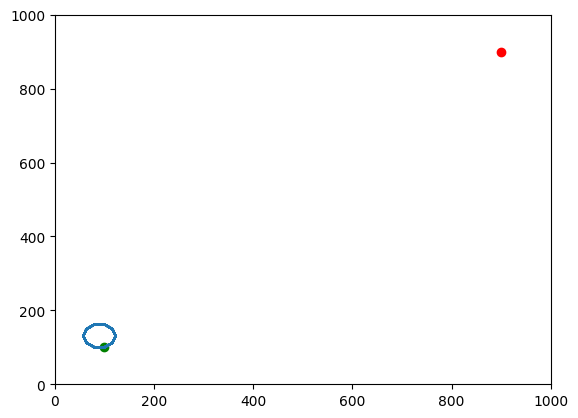

In [2]:

done = False
#绘制x,y轴
X=[]
Y=[]
count = 0
while not done:
    X.append(env.xy[0])
    Y.append(env.xy[1])
    count+=1
    action = 2 #np.random.randint(5)
    #print("航向角---转向---航向角\n")
    #print(env.heading,action,env.xy)
    next_state, reward, done = env.step(action)
    #print(env.get_angle(),env.get_angle2goal())
    #print(env.xy,env.heading)
    print(env.observation)
    state = next_state
    episode_return += reward
    #print(reward)
    if (count>300):
        done = True
#画图可视化
print(episode_return)
plt.plot(100, 100, 'go')  # 'ro'表示红色的点
plt.plot(900, 900, 'ro')  # 'ro'表示红色的点
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.plot(X,Y)
plt.show()

In [4]:

import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env.dummy_vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import gym
import envlx_only
env = envlx_only.DroneEnv()
# 把环境向量化，如果有多个环境写成列表传入DummyVecEnv中，可以用一个线程来执行多个环境，提高训练效率
#env = DummyVecEnv([lambda : env])
# 定义一个DQN模型，设置其中的各个参数
model = DQN(
    "MlpPolicy",                                # MlpPolicy定义策略网络为MLP网络
    env=env, 
    learning_rate=5e-4,
    batch_size=128,
    buffer_size=50000,
    learning_starts=0,
    target_update_interval=250,
    policy_kwargs={"net_arch" : [256, 256]},     # 这里代表隐藏层为2层256个节点数的网络
    verbose=1,                                   # verbose=1代表打印训练信息，如果是0为不打印，2为打印调试信息
    tensorboard_log="./tensorboard/CartPole-v0/"  # 训练数据保存目录，可以用tensorboard查看
)
# 开始训练
model.learn(total_timesteps=1e5)
# 策略评估，可以看到倒立摆在平稳运行了
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=True)
#env.close()
print("mean_reward:",mean_reward,"std_reward:",std_reward)
# 保存模型到相应的目录
model.save("TrainedModel/Actor1.pkl")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./tensorboard/CartPole-v0/DQN_25


C:\ProgramData\anaconda3\envs\UAV\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.1     |
|    ep_rew_mean      | 256      |
|    exploration_rate | 0.979    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1043     |
|    time_elapsed     | 0        |
|    total_timesteps  | 225      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 20.8     |
|    n_updates        | 56       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.5     |
|    ep_rew_mean      | 974      |
|    exploration_rate | 0.947    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1093     |
|    time_elapsed     | 0        |
|    total_timesteps  | 559      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 16.2     |
|    n_updates      

In [5]:
model.save("C:/Users/10749/Desktop/my_UAV/DQN+UAV/V1/TrainedModel/Actor1.pkl")

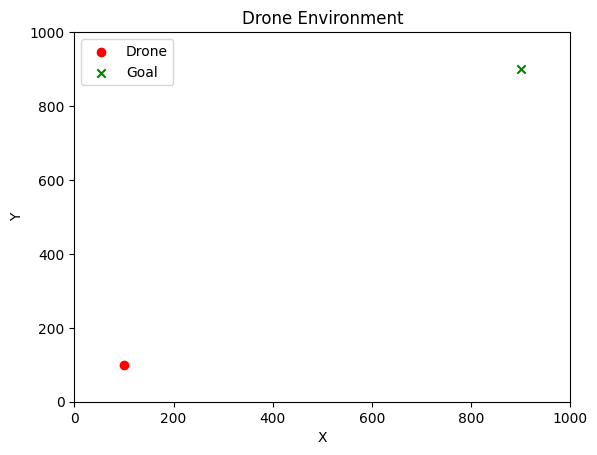

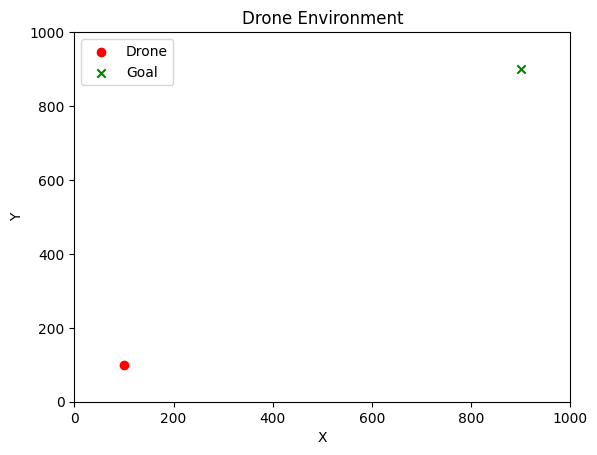

[-0.7853981633974483] 2
33.49872782412467


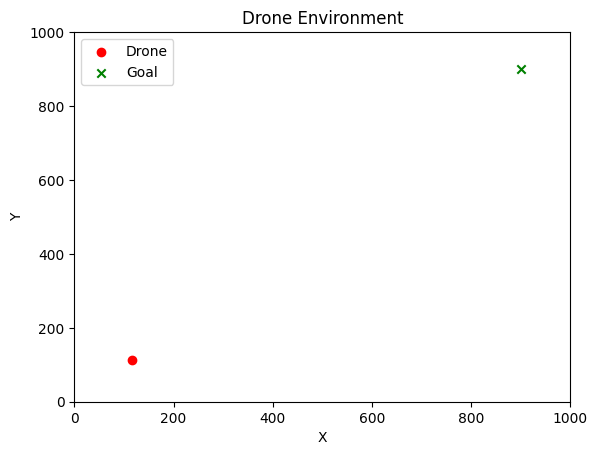

[-0.15989416394840372] 1
66.97920702143483


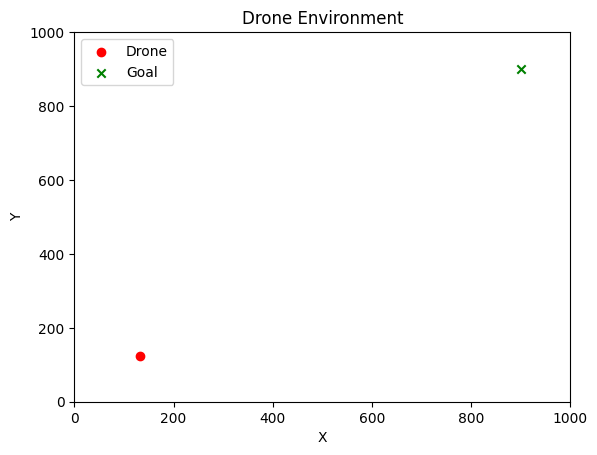

[-0.16281048745327809] 1
100.44042962064805


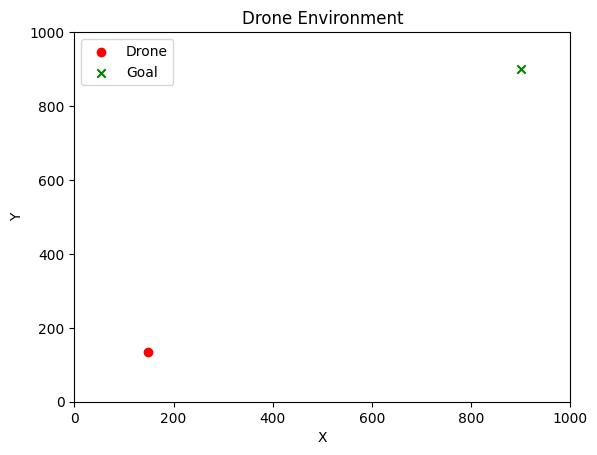

[-0.1658341747100751] 1
133.88131257259238


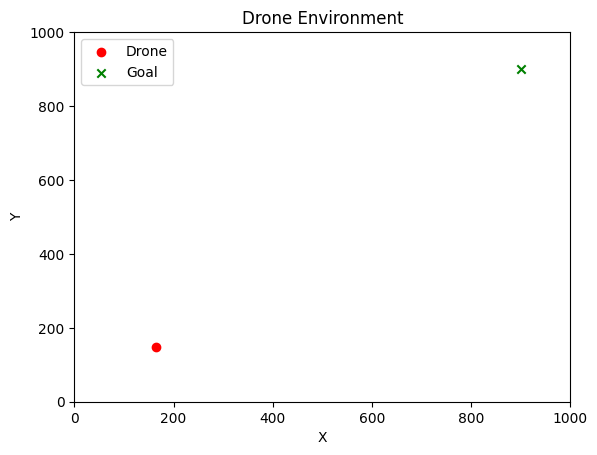

[-0.16897120727994253] 1
167.30069068222792


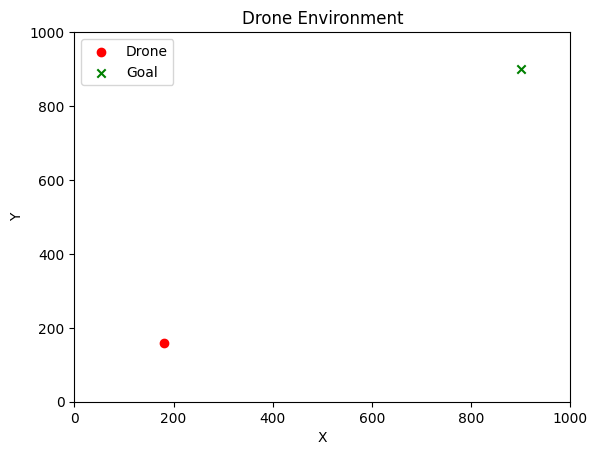

[-0.172228014786449] 1
200.69730873356252


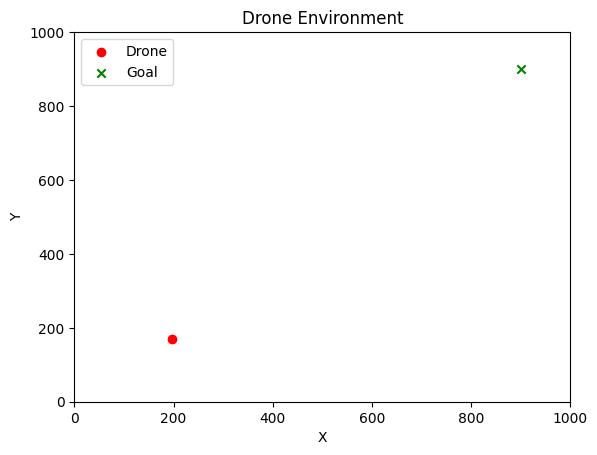

[-0.1756115171917738] 1
234.06981269883545


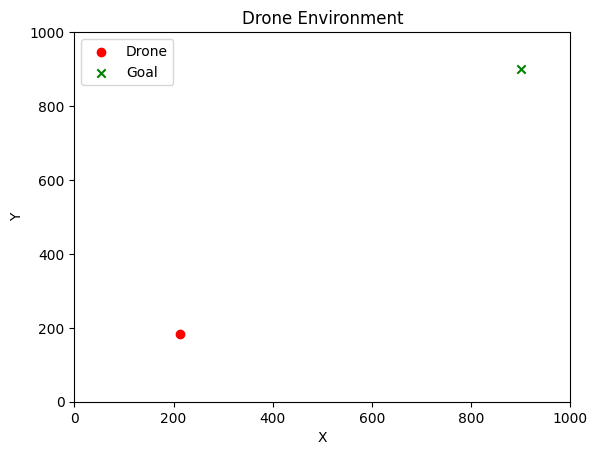

[-0.17912917189162725] 1
267.41673990644586


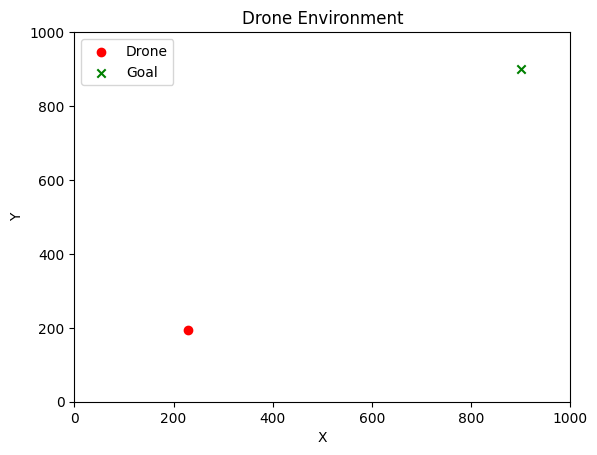

[-0.18278902627313443] 1
300.7365080222726


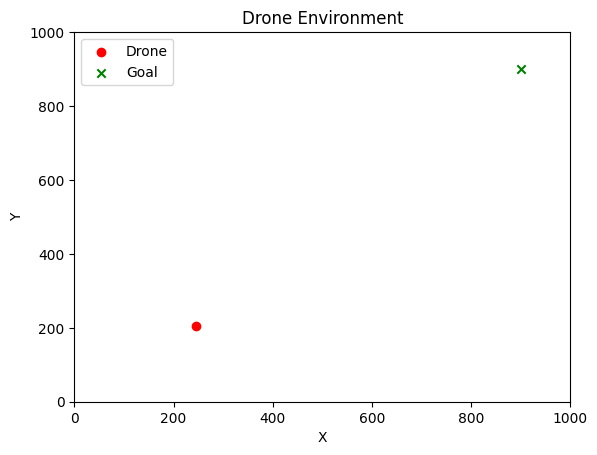

[-0.18659977647865045] 1
334.0274026756126


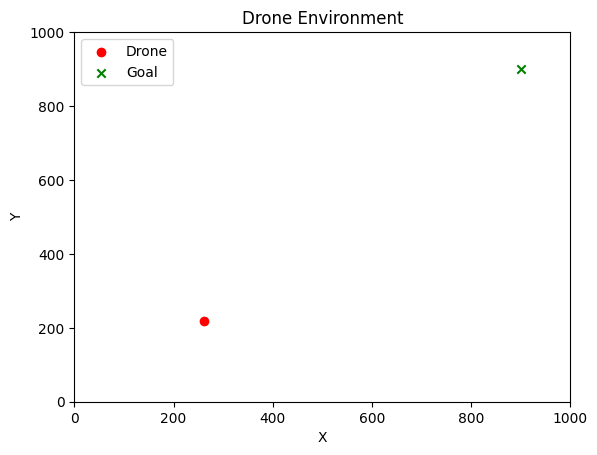

[-0.19057083323430968] 1
367.2875635332764


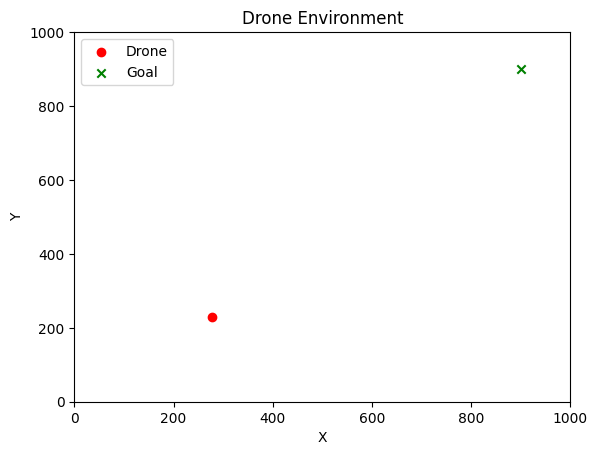

[-0.1947123957382333] 1
400.5149685925378


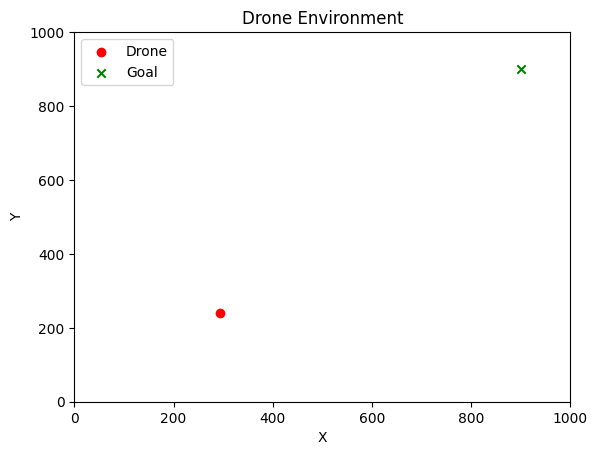

[-0.19903553476368163] 1
433.7074164245755


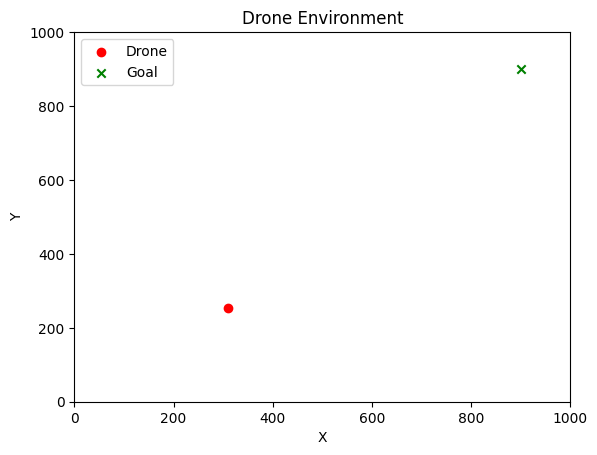

[-0.20355228632183797] 1
466.8625060534266


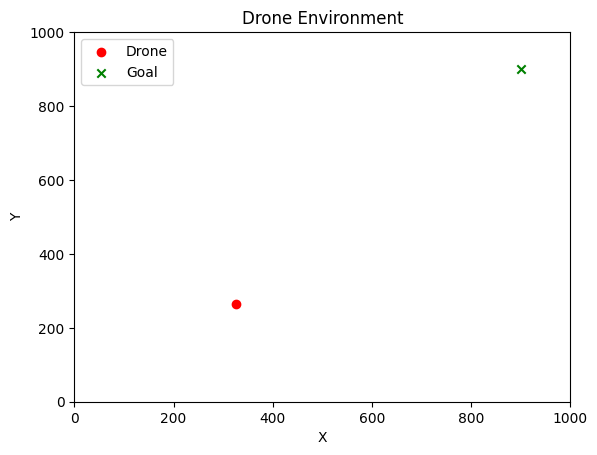

[-0.20827575745309845] 1
499.97761409970326


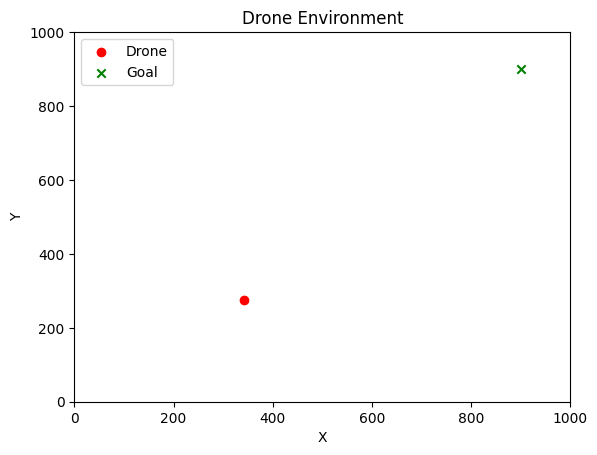

[-0.21322024598177336] 1
533.0498687513532


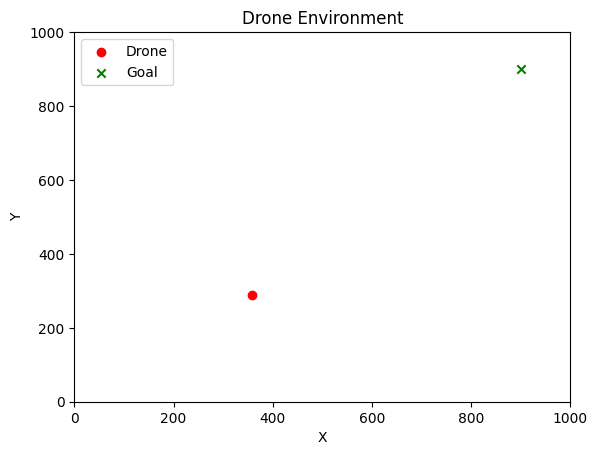

[-0.2184013763855659] 1
566.0761200430991


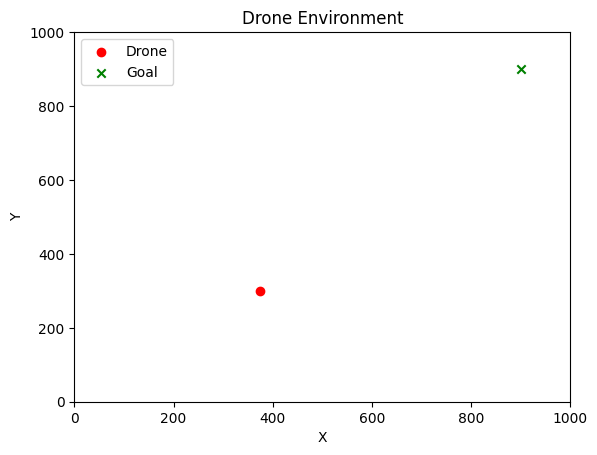

[-0.22383625430850396] 1
599.0529058287427


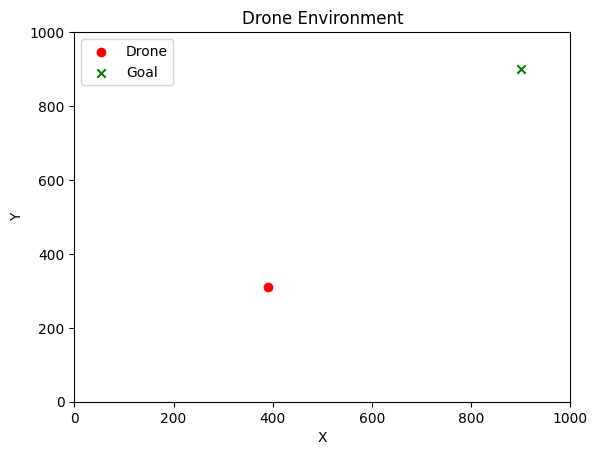

[-0.2295436426969597] 1
631.976412712351


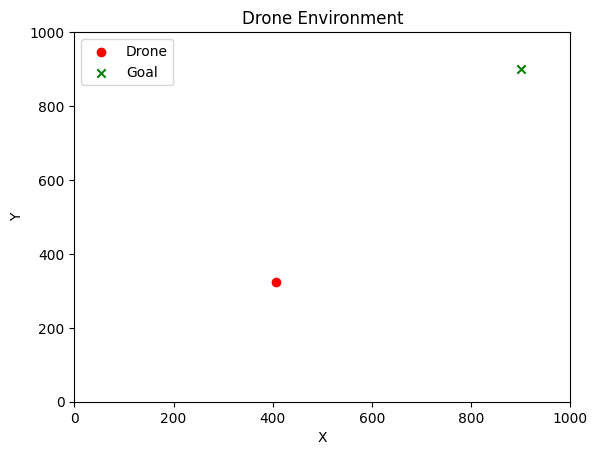

[-0.23554416307858972] 1
664.8424310606142


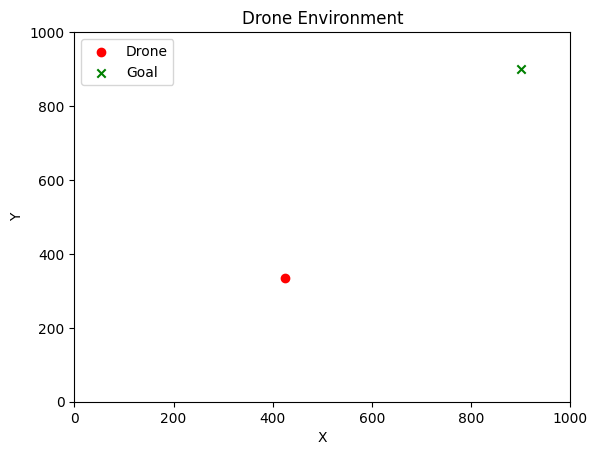

[-0.24186052615260456] 1
697.6463030431537


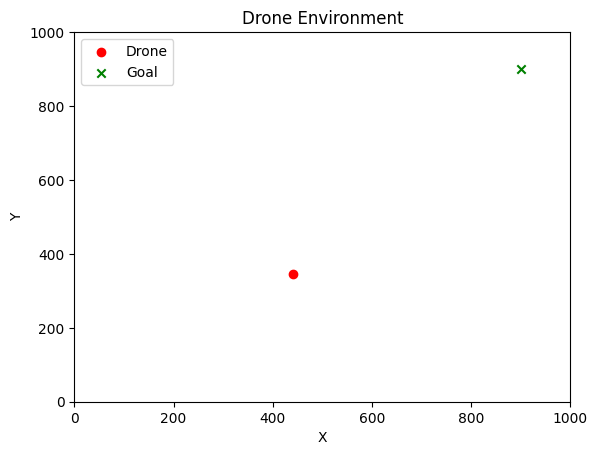

[-0.24851779664002027] 1
730.3828624325636


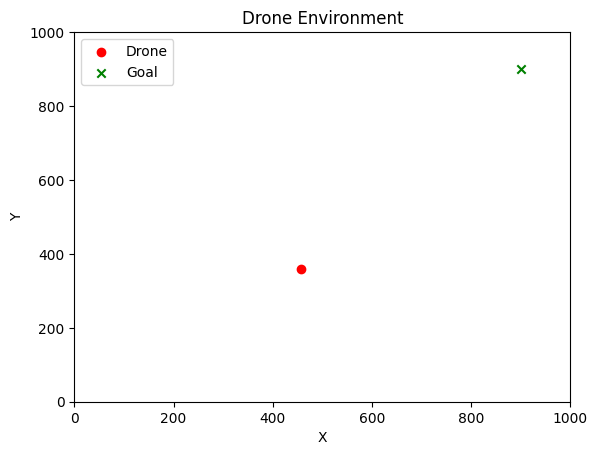

[-0.2555436982831165] 1
763.0463646315884


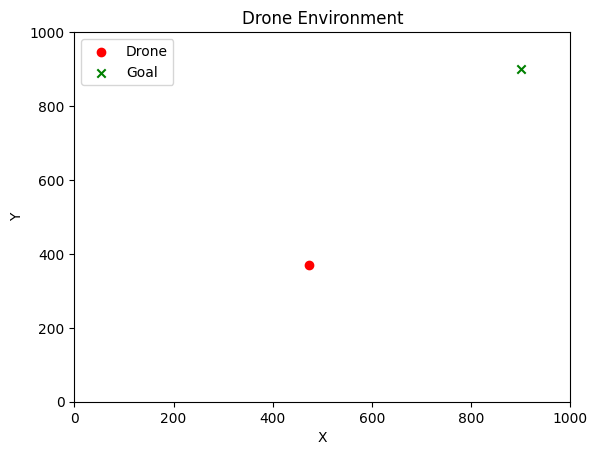

[-0.2629689660189385] 1
795.6304050686203


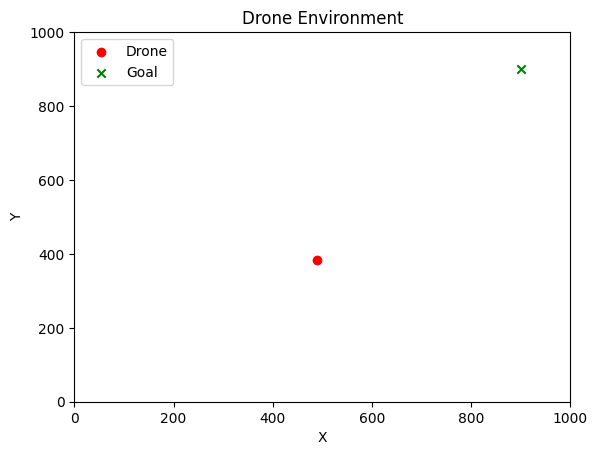

[-0.2708277537248085] 1
828.12782369867


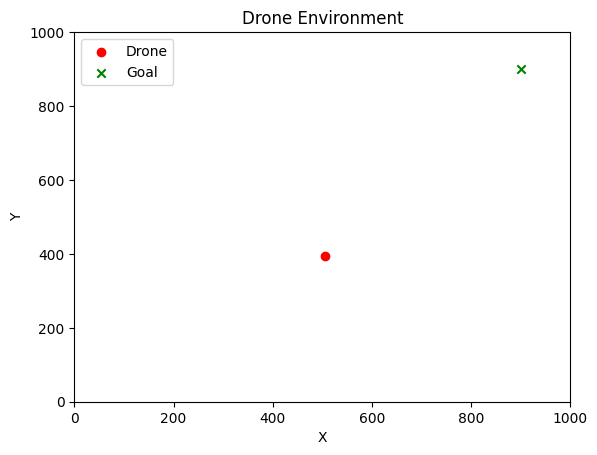

[-0.2791581075956122] 1
860.5305928448345


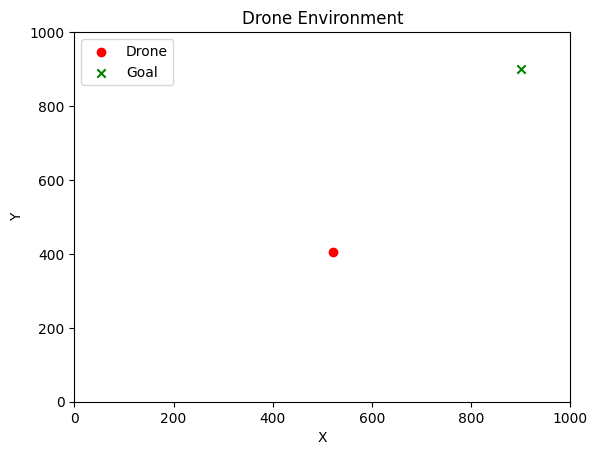

[-0.2880025172246121] 1
892.8296849890055


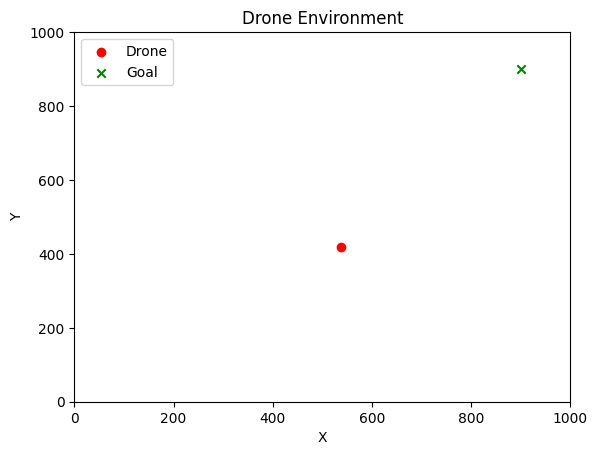

[-0.29740855889462736] 1
925.0149163368301


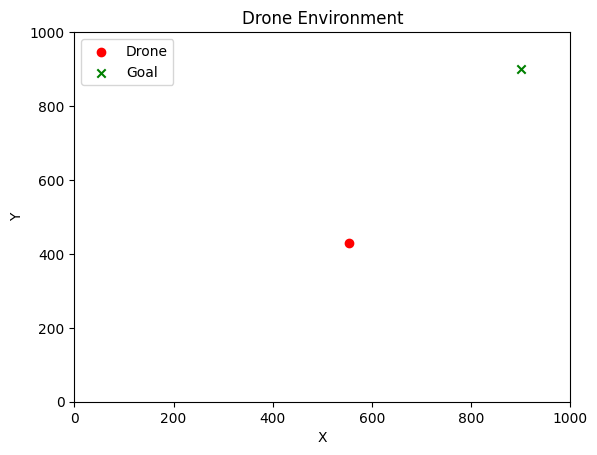

[-0.3074296485293937] 2
956.902814940019


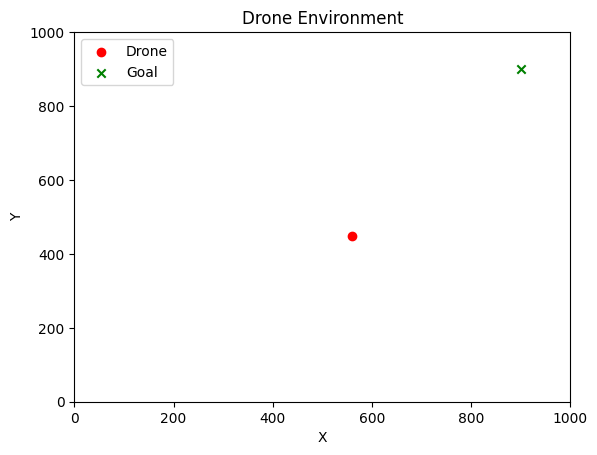

[0.33203593610168847] 0
989.097594942564


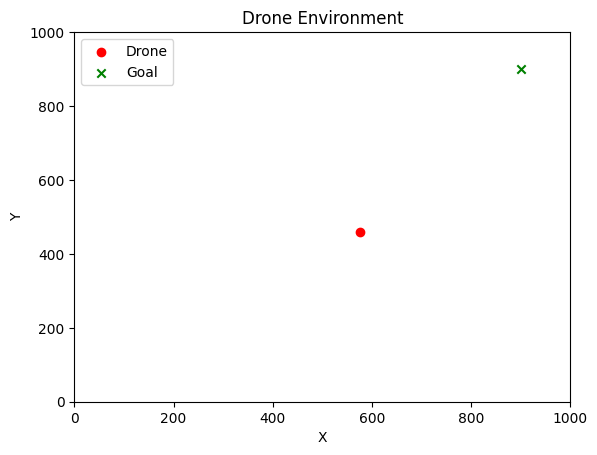

[-0.3069614744435336] 2
1020.9743031631206


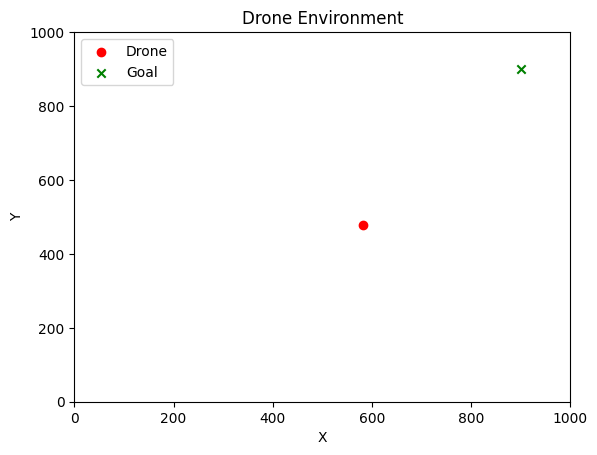

[0.3333241610205526] 0
1053.1799979893674


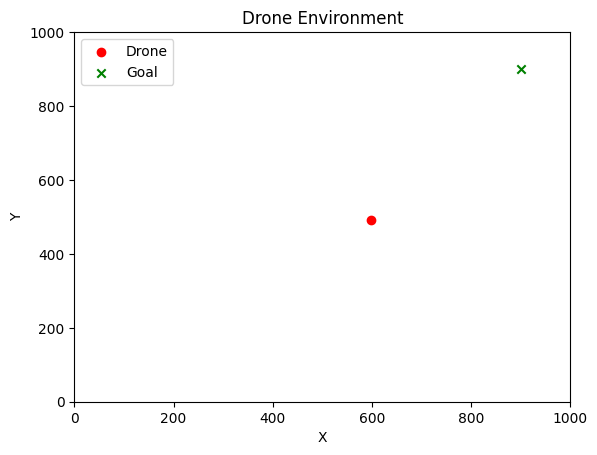

[-0.3064232901024653] 2
1085.0437672280555


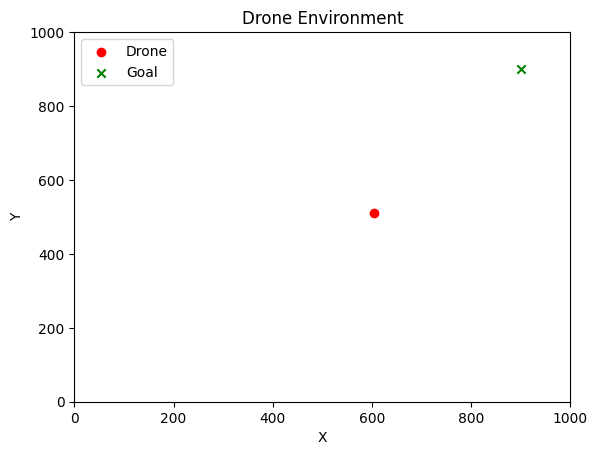

[0.33481243933790017] 0
1117.2620586722278


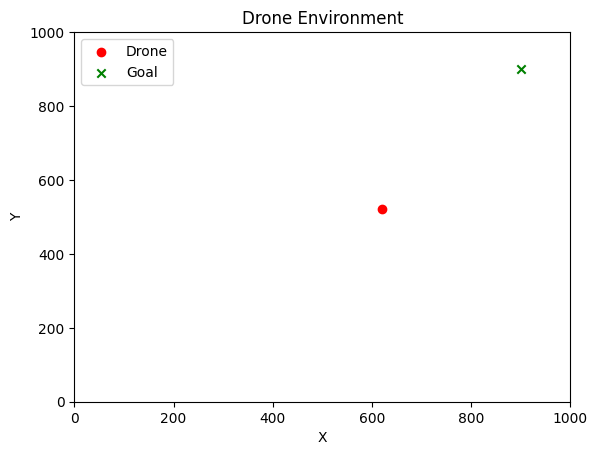

[-0.3057981229547644] 2
1149.1106959416386


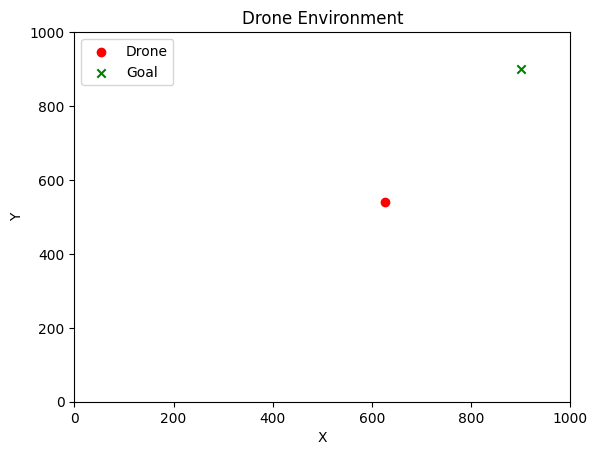

[0.3365512862008657] 0
1181.3436866936568


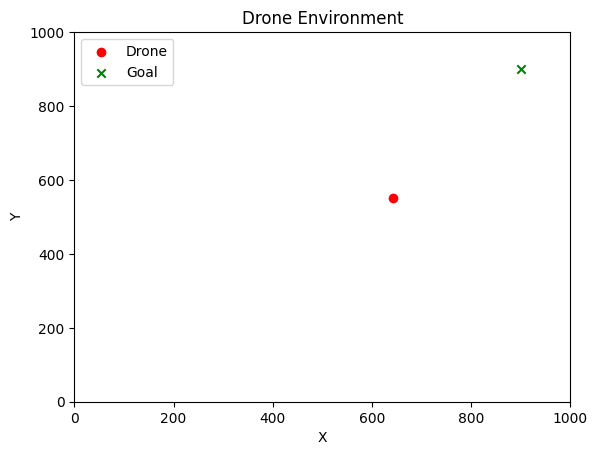

[-0.305063032102983] 2
1213.1743901831944


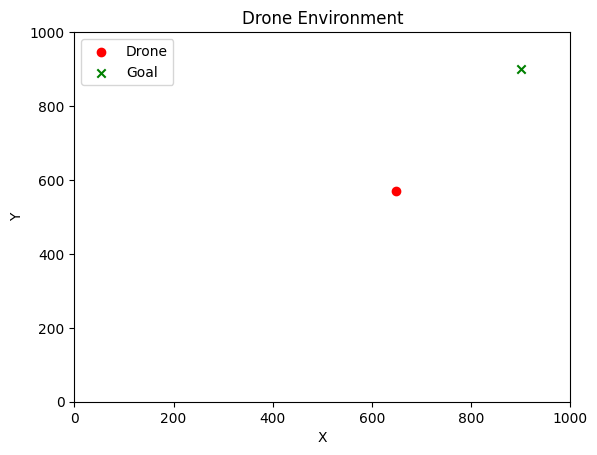

[0.3386097834391504] 0
1245.424756941978


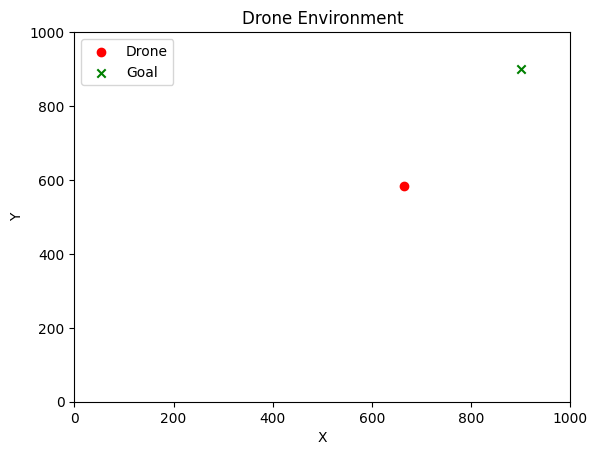

[-0.30418623210021956] 2
1277.2338678230306


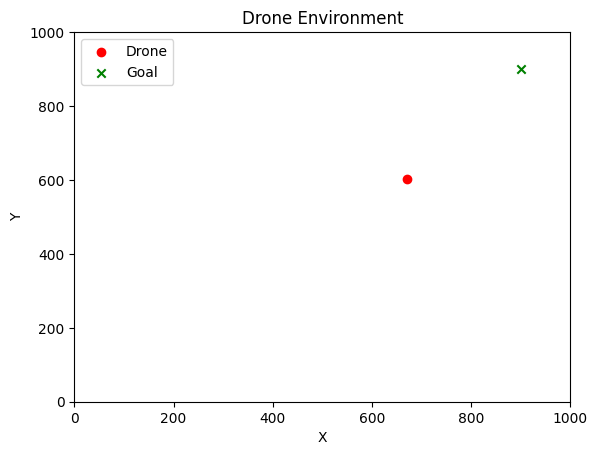

[0.3410849705661443] 0
1309.5050909239126


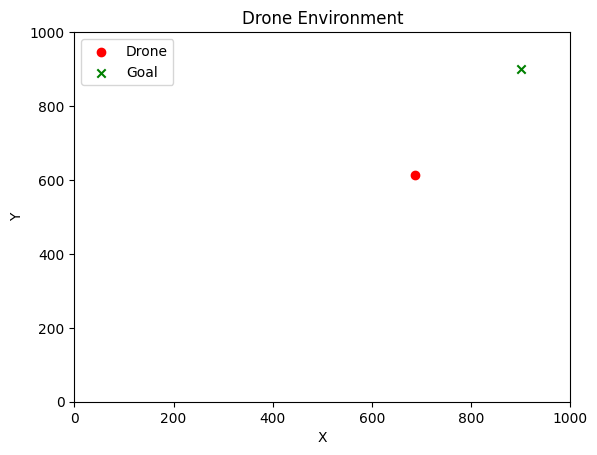

[-0.30312237612767357] 2
1341.2877044287002


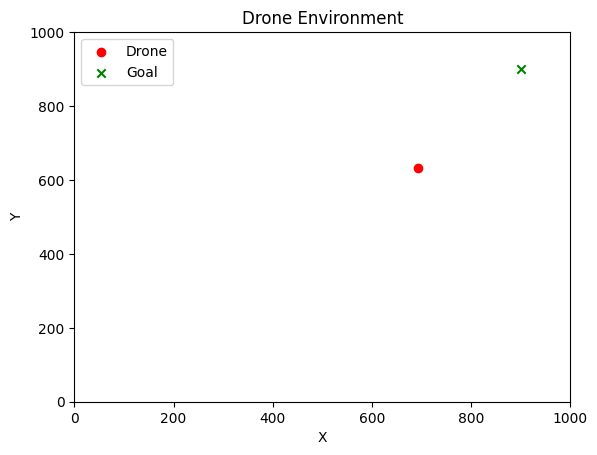

[0.34411757532333187] 0
1373.5844248957676


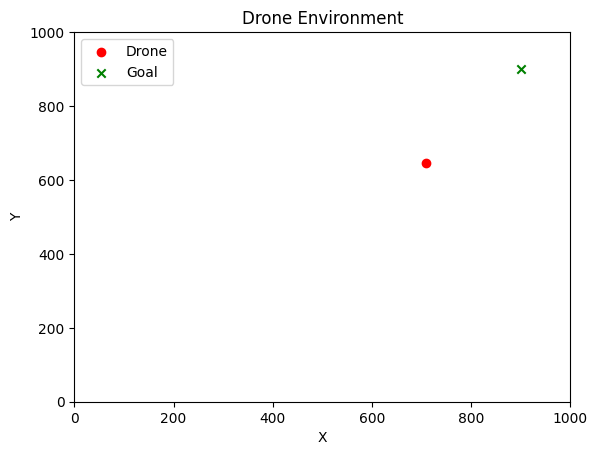

[-0.30180446034509734] 2
1405.3337527661133


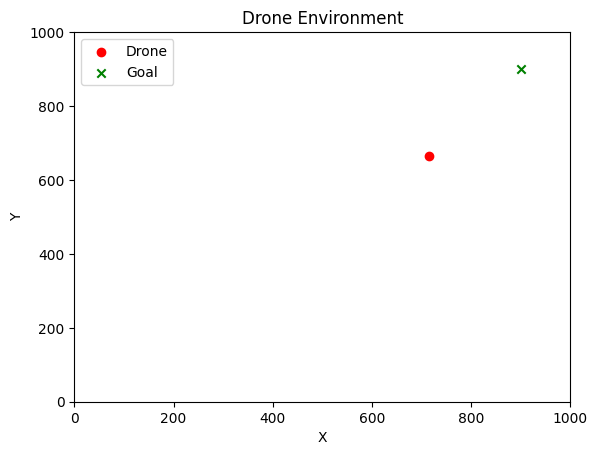

[0.34791970746949863] 0
1437.6623520694727


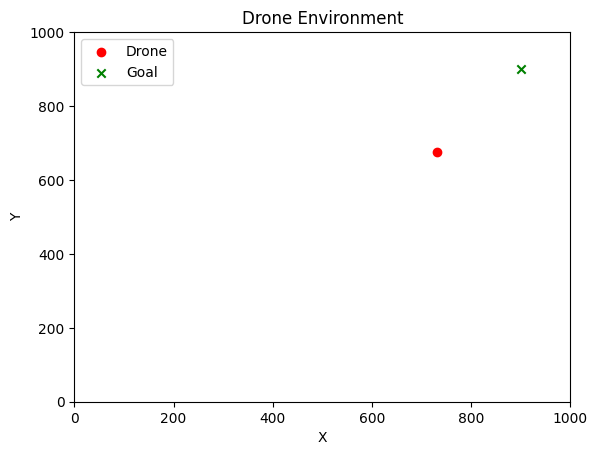

[-0.3001291430215325] 2
1469.3686179208253


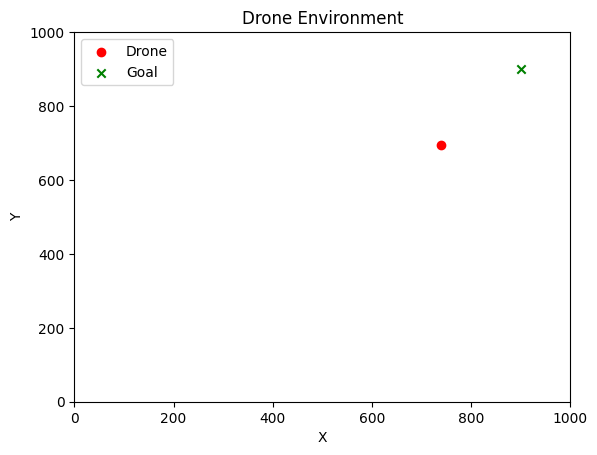

[0.35282666496593595] 0
1501.7382104310677


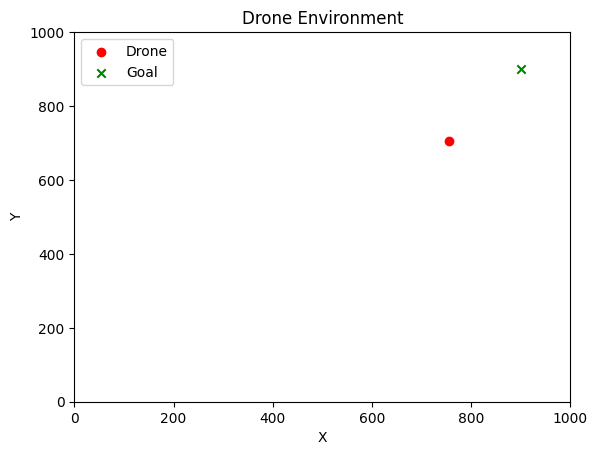

[-0.2979282496128839] 1
1533.8218114929607


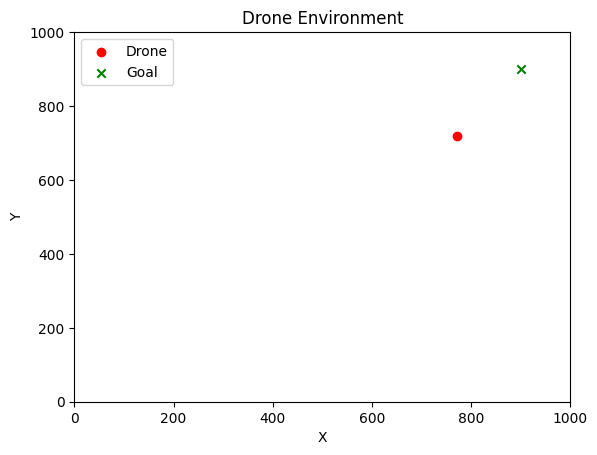

[-0.32420357473355743] 2
1565.810845358365


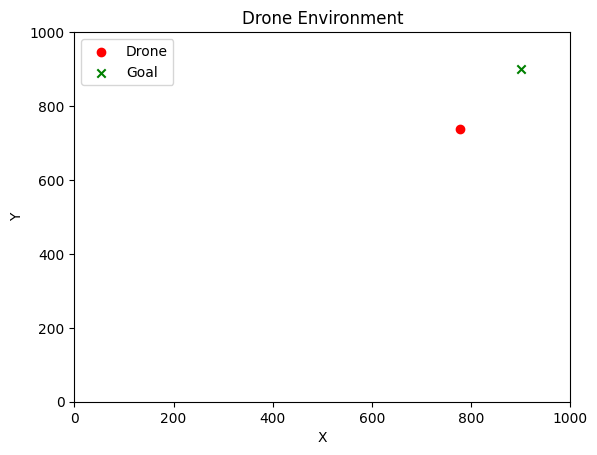

[0.3334100501066146] 0
1597.9017074034114


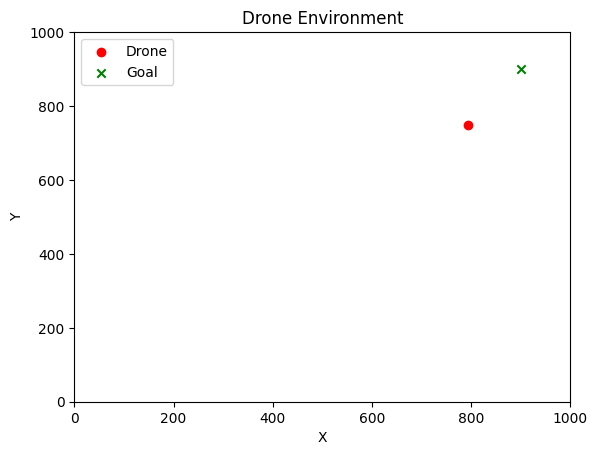

[-0.32626431299574277] 2
1629.8780467937113


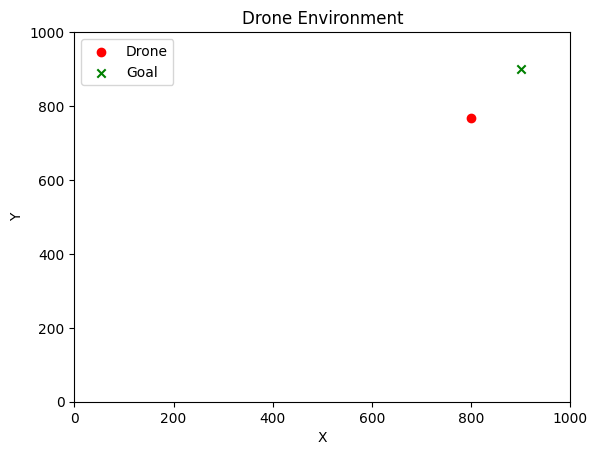

[0.337810052898889] 0
1661.979215550347


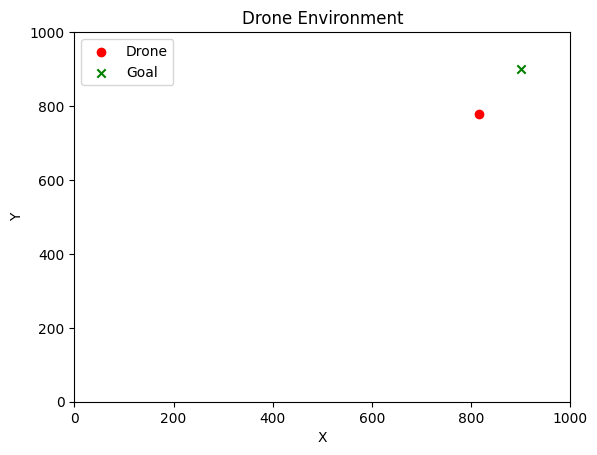

[-0.32938881428017863] 2
1693.9349864239357


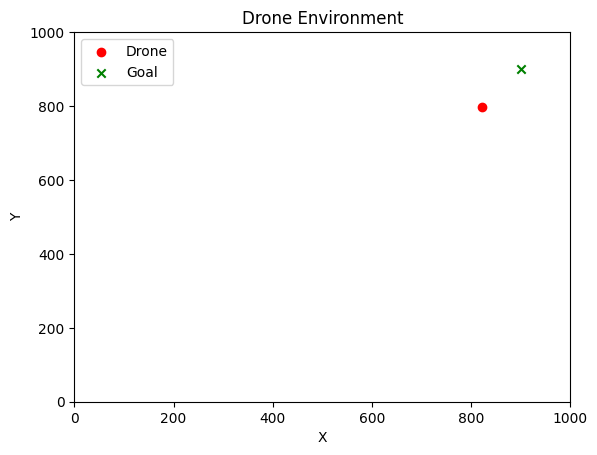

[0.34481651232293276] 0
1726.0518439644998


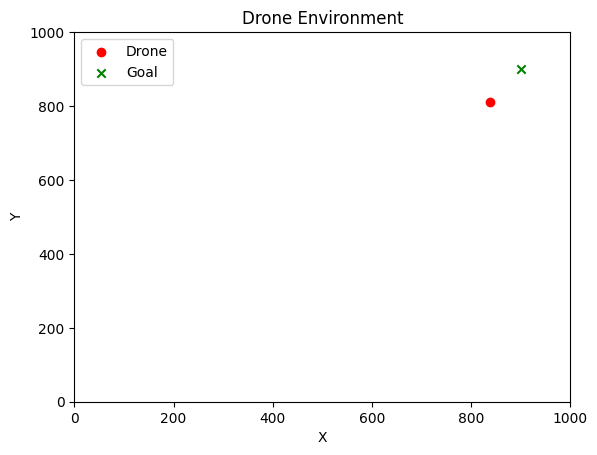

[-0.3346871559159741] 2
1757.9687113826453


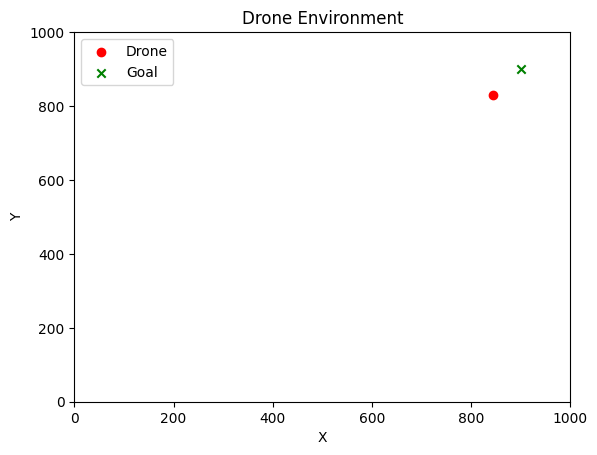

[0.3577180045022583] 0
1790.1117845168571


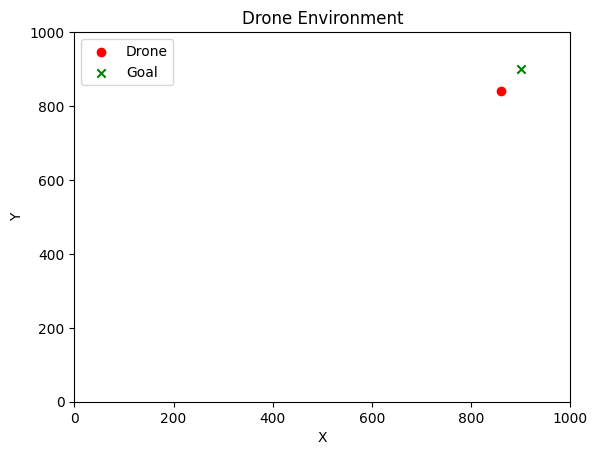

[-0.34563700638720984] 2
1821.928688147505


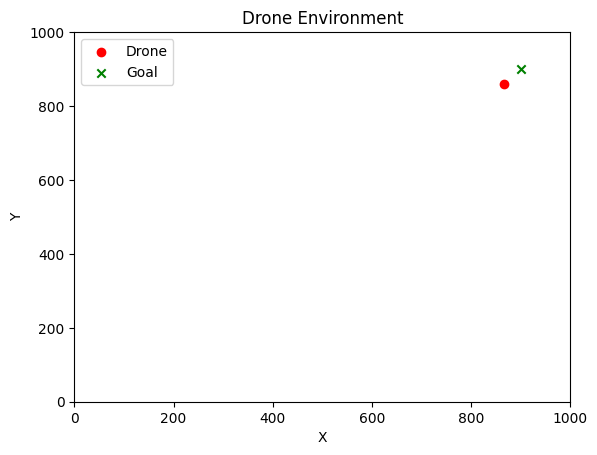

[0.3893328757049672] 0
1854.115569895877


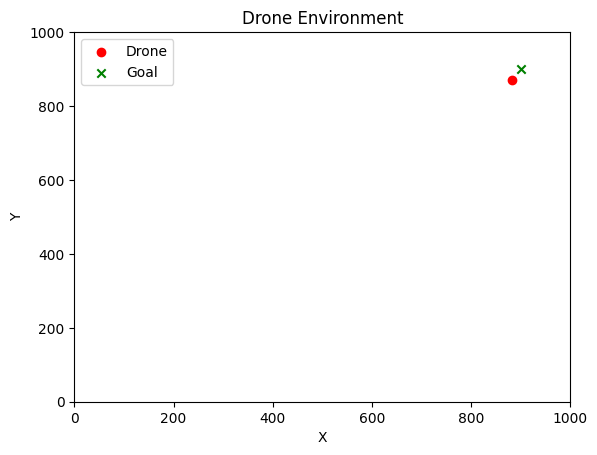

[-0.38158520254819717] 2
1885.2396618026905


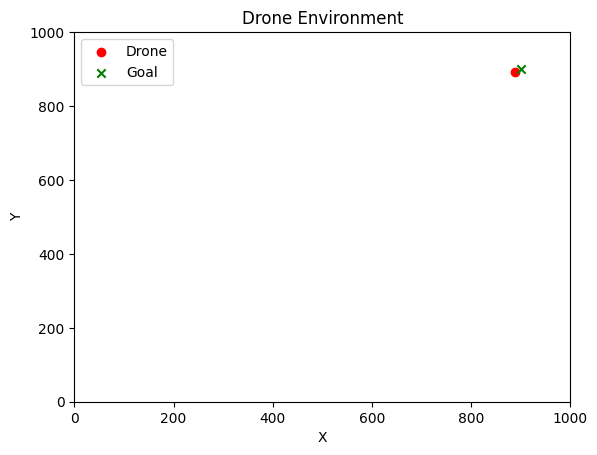

[0.5842518573211422] 0
1898.135173391834


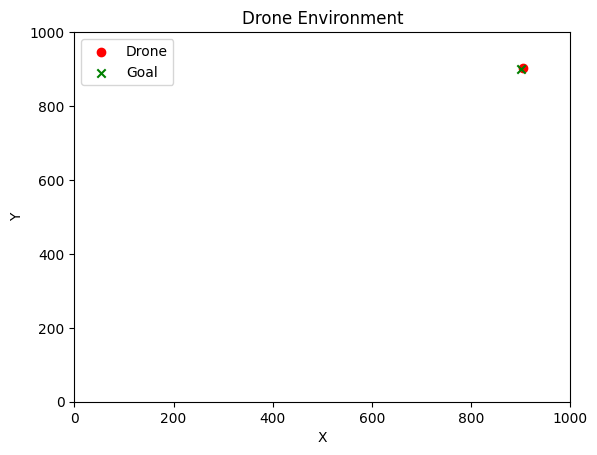

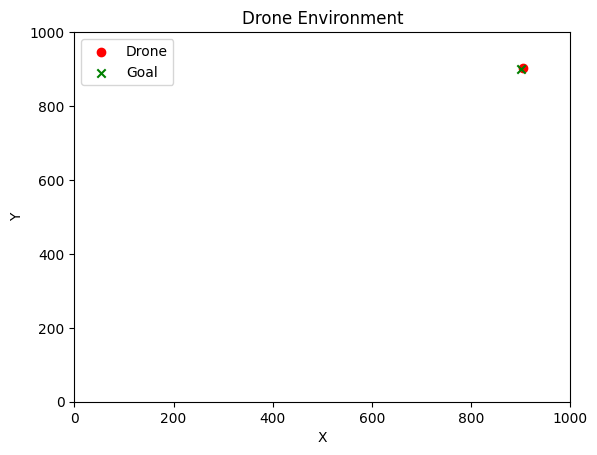

[-3.018752224510793] 2
-43.69131872902997


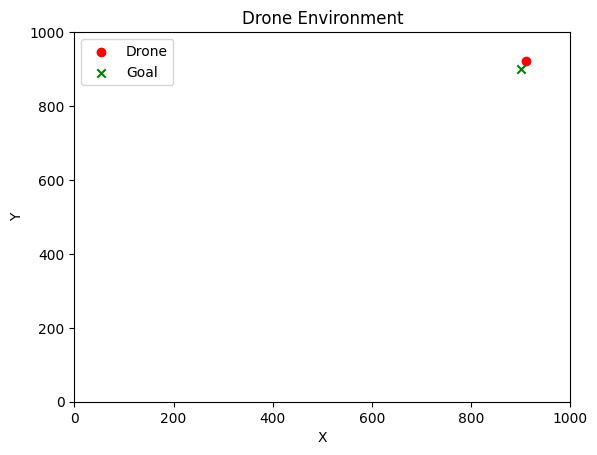

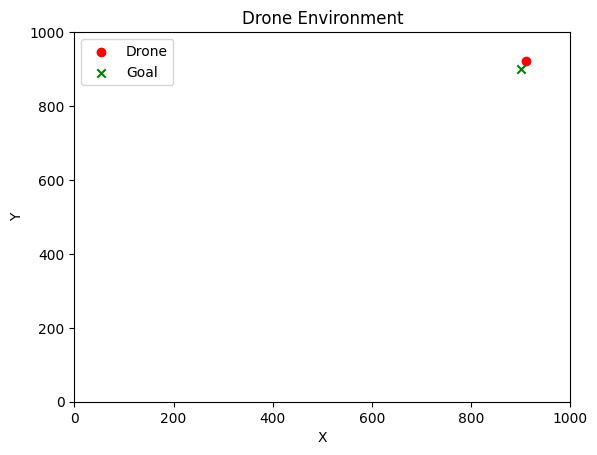

[-2.991147262082176] 2
-39.451075096065125


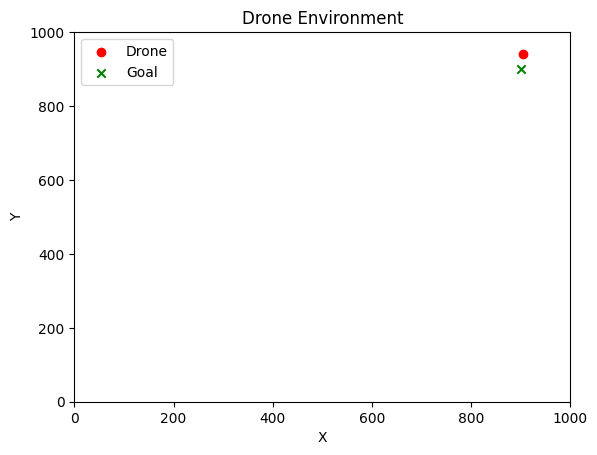

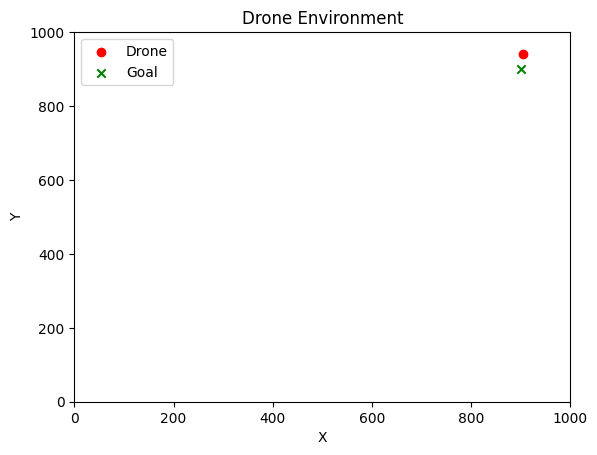

[-2.71366852327942] 2
-31.496035974575946


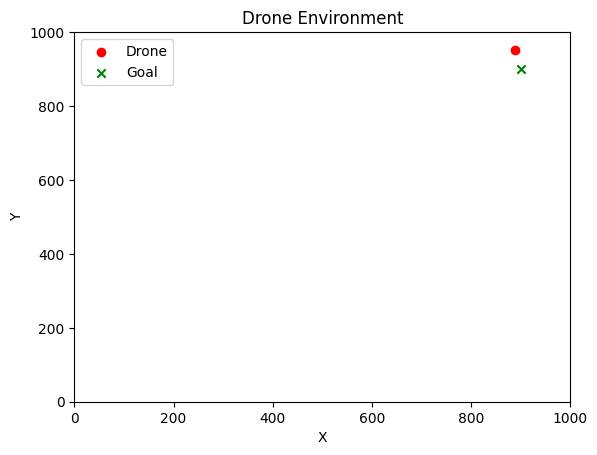

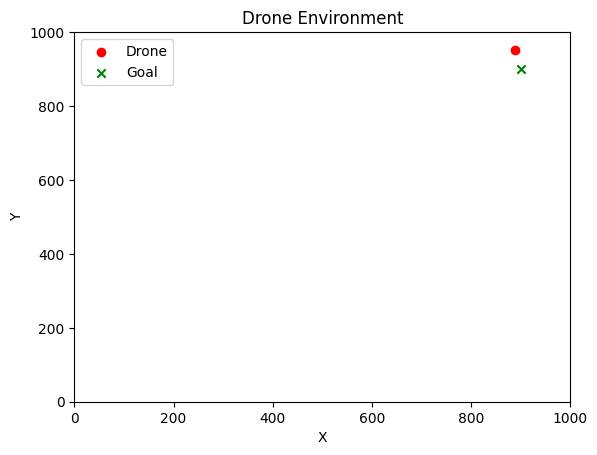

[-2.416025406937286] 2
-21.016756834808817


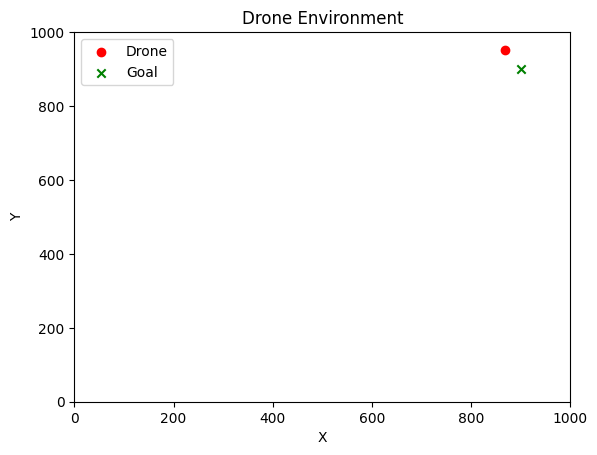

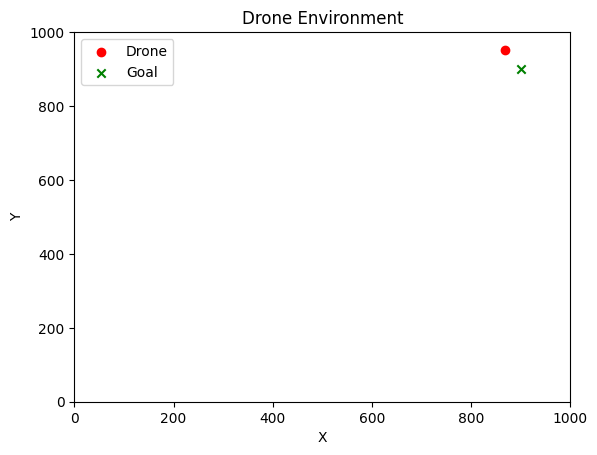

[-2.112909201362042] 2
-9.06106349686955


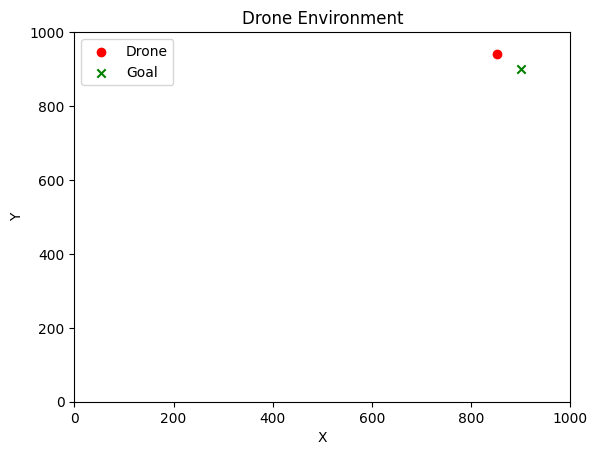

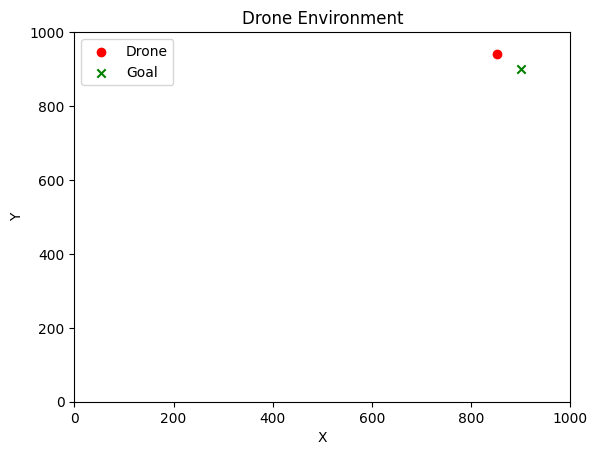

[-1.8081999821301276] 2
3.1951963645305312


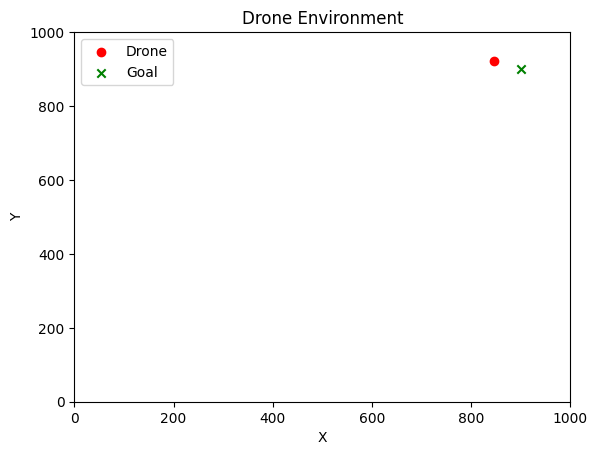

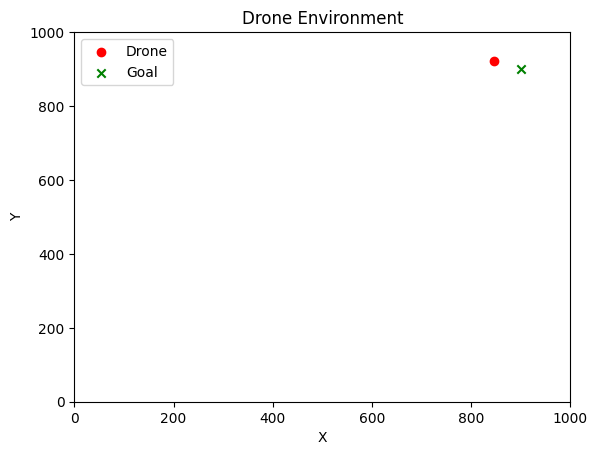

[-1.503989952696564] 2
14.548237412185543


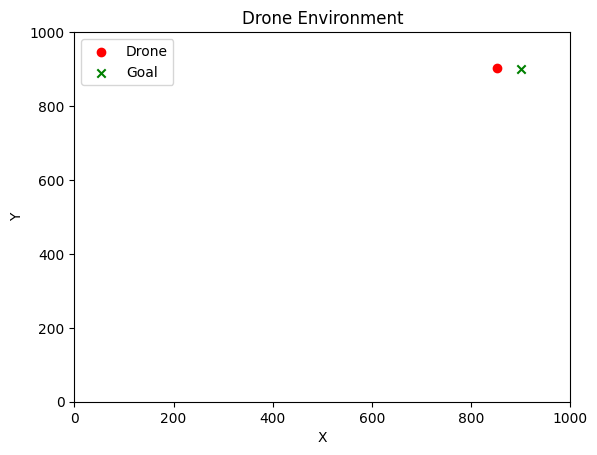

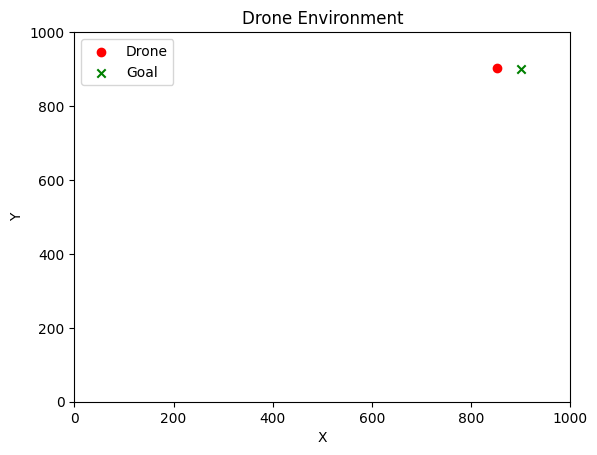

[-1.20287619100508] 2
23.87686114889678


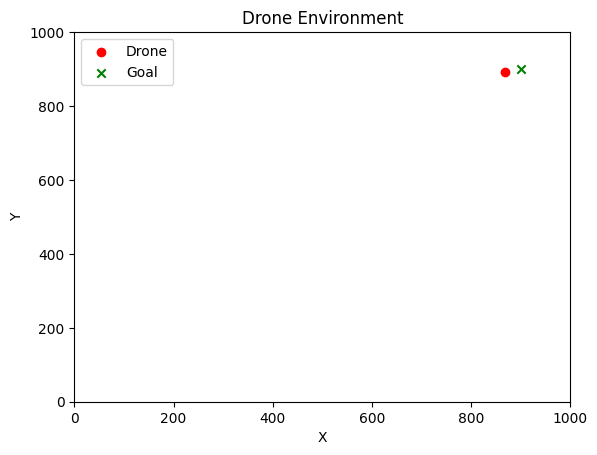

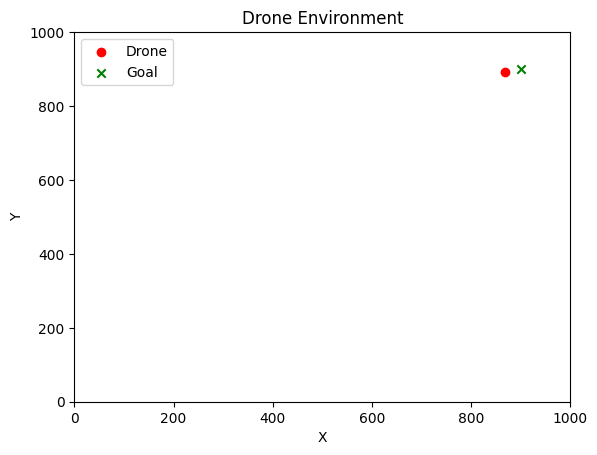

[-0.9117759338346563] 2
30.200443616593105


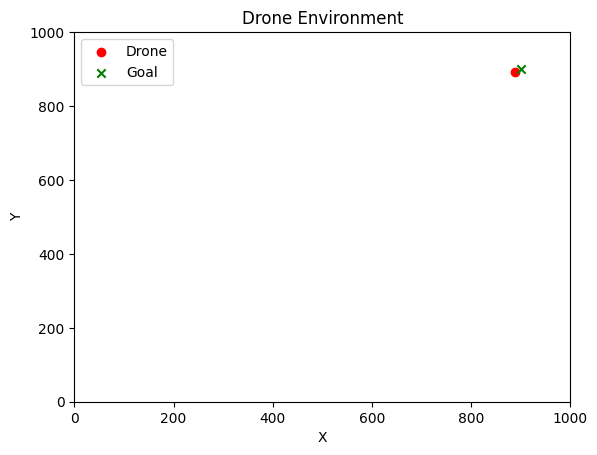

In [6]:
import matplotlib.pyplot as plt
# 在每个 episode 的开始调用一次 env.render()
state = env.reset()
env.render(mode='human')

for i in range(10):
    done = False
    r = 0
    while not done:
        env.render(mode='human')
        action, _states = model.predict(state, deterministic=True)
        print(state, action)
        next_state, reward, done, info = env.step(action)
        r += reward
        state = next_state
        print(r)

# 在每个 episode 结束后再调用一次 env.render()
    env.render(mode='human')
    plt.show()